# Compare ODC to ODC-lite

1. use dc.load
2. comapre for lc_search - for same AOI

## Start with ODC proper

In [1]:
import datacube
from datetime import datetime
dc= datacube.Datacube()
from noteLib import *


Failed to resolve driver datacube.plugins.index::s3aio_index


In [2]:
x_lon_extent = (-119.44,-119.18)
y_lat_extent = (36.80,36.96)


In [3]:
#x = (ulx,lrx)
#y = (uly,lry)

date_range = (
        datetime(2014,6,13),
        datetime(2014,7,16))

product = 'l8_kline'
ds = dc.find_datasets(product=product,
             x = x_lon_extent, y =y_lat_extent,
             output_crs = 'epsg:32610', resolution = (-30,30),
             time = date_range, measurements = ('red') )


In [4]:
len(ds)

6

In [5]:
myds = ds[0]

In [6]:
myds.bounds




ulX = myds.bounds.left
ulY = myds.bounds.top

lrX = myds.bounds.right
lrY = myds.bounds.bottom

m = aea_base_map(ulX,ulY,lrX,lrY)
aea_display_map(m,ulX,ulY,lrX,lrY)


In [7]:
product = 'l8_kline'
xr = dc.load(product=product,
             x = x_lon_extent, y =y_lat_extent,
             output_crs = 'epsg:32610', resolution = (-30,30),
             time = date_range, measurements = ('red', 'green', 'blue','nir') )


/usr/local/lib/python3.6/dist-packages/xarray/core/variable.py:134: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  return np.asarray(pd.Series(values.ravel())).reshape(values.shape)
Failed to resolve driver datacube.plugins.io.read::s3aio
Failed to resolve driver datacube.plugins.io.read::s3aio_test


In [8]:
xr

<xarray.Dataset>
Dimensions:  (time: 6, x: 797, y: 623)
Coordinates:
  * time     (time) datetime64[ns] 2014-06-15T18:39:36.452378 ... 2014-07-10T18:33:58.309266
  * y        (y) float64 4.097e+06 4.097e+06 4.097e+06 ... 4.079e+06 4.079e+06
  * x        (x) float64 8.17e+05 8.17e+05 8.17e+05 ... 8.408e+05 8.409e+05
Data variables:
    red      (time, y, x) int16 -9999 -9999 -9999 -9999 ... 928 762 898 1074
    green    (time, y, x) int16 -9999 -9999 -9999 -9999 ... 749 640 707 798
    blue     (time, y, x) int16 -9999 -9999 -9999 -9999 ... 452 423 434 537
    nir      (time, y, x) int16 -9999 -9999 -9999 -9999 ... 2273 2129 2337 2455
Attributes:
    crs:      epsg:32610

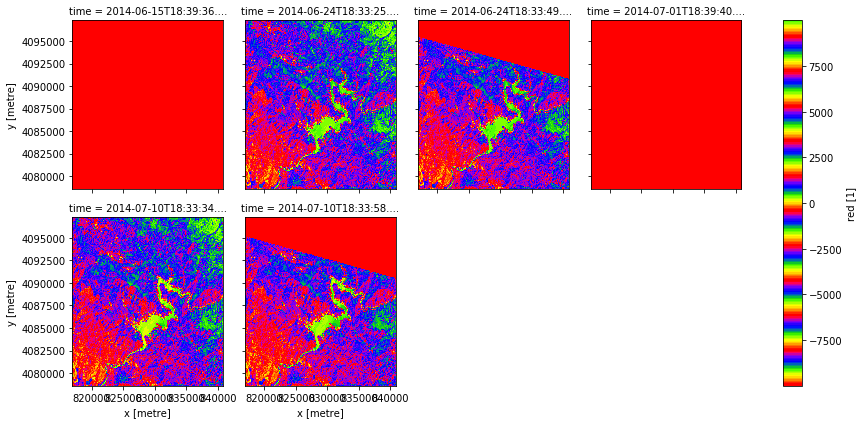

In [9]:
xr['red'].plot.imshow('x', 'y', col='time', col_wrap=4, cmap='prism')

In [10]:
from lilcubeLib.lc_geometry import geo_translate, geo_untranslate
#dir(lilcubeLib.lc_geometry)
gulx,guly = geo_untranslate(ulX, ulY)

help(geo_untranslate)

Help on function geo_untranslate in module lilcubeLib.lc_geometry:

geo_untranslate(x, y, epsg='epsg:5072')
    converts albers X and Y to lat, lon
    
    Returns: lat, lon



In [11]:
gulx

38.32545571982273

In [12]:
guly

-120.81166479596247

In [13]:
def return_path_row(file_path):
    # print(file_path)
    a = file_path.split('_')
    # print(a[0])
    print(a[2], a[9])
    return(a[2])


In [14]:
for t in range(0,len(ds)):
    myds = ds[t]
    fp = myds.measurements['red']['path']
    return_path_row(fp)
    print(myds.measurements['red']['path'])
    #print(dir(myds.extent))
    #print(myds.extent.crs)
    #print(myds.extent.boundary)
    # print(dir(myds.extent.boundary))
    print((myds.extent.boundary.coords))
    ulxy = myds.extent.boundary.coords[0]
    print(ulxy)
    geox, geoy = geo_untranslate(ulxy[0],ulxy[1])
    
    print(geox,geoy)

    
    #print(myds.extent.boundingbox)
    
    #print(myds.bounds)


042034 20140624
s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140624_20171210_01_A1/LC08_L2SP_042034_20140624_20171210_01_A1_sr_band4.TIF
[(-2124300.0, 1714200.0), (-2124300.0, 1978200.0), (-1866300.0, 1978200.0), (-1866300.0, 1714200.0), (-2124300.0, 1714200.0)]
(-2124300.0, 1714200.0)
36.04678274008947 -120.04841011978083
042034 20140710
s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140710_20171210_01_A1/LC08_L2SP_042034_20140710_20171210_01_A1_sr_band4.TIF
[(-2125500.0, 1714200.0), (-2125500.0, 1978500.0), (-1867200.0, 1978500.0), (-1867200.0, 1714200.0), (-2125500.0, 1714200.0)]
(-2125500.0, 1714200.0)
36.04409927317559 -120.06142185554418
042035 20140624
s3://lsaa-staging-cog/L08/2014/042/035/LC08_L2SP_042035_20140624_20171210_01_A1/LC08_L2SP_042035_20140624_20171210_01_A1_sr_band4.TIF
[(-2199600.0, 1567500.0), (-2199600.0, 1831800.0), (-1941300.0, 1831800.0), (-1941300.0, 1567500.0), (-2199600.0, 1567500.0)]
(-2199600.0, 1567500.0)
34.60862657963641 -120.4

In [15]:



myds = ds[0]
fp = myds.measurements['red']['path']
return_path_row(fp)
print(myds.measurements['red']['path'])
ulxy = myds.extent.boundary.coords[3]
geox, geoy = geo_untranslate(ulxy[0],ulxy[1])

print(ulxy)
print(geox, geoy)
myds.bounds


# In[11]:


ulX = myds.bounds.left
ulY = myds.bounds.top
print(ulX,ulY)
geox, geoy = geo_untranslate(ulX,ulY)


print(geox, geoy)

lrX = myds.bounds.right
lrY = myds.bounds.bottom

m = aea_base_map(ulX,ulY,lrX,lrY)
m = aea_display_map(m,ulX,ulY,lrX,lrY)

ulxy = myds.extent.boundary.coords[1]
lrxy = myds.extent.boundary.coords[3]

m = aea_display_map(m,ulxy[0],ulxy[1],lrxy[0],lrxy[1], color='yellow')

042034 20140624
s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140624_20171210_01_A1/LC08_L2SP_042034_20140624_20171210_01_A1_sr_band4.TIF
(-1866300.0, 1714200.0)
36.5904008577592 -117.23015362643991
-2124300.0 1978200.0
38.32545571982273 -120.81166479596247


In [16]:
m

In [17]:
def pgeo(tup):
    gx, gy = geo_untranslate(tup[0], tup[1])
    print(gx, gy)
    

In [18]:
print(ulxy)
pgeo(ulxy)
print(lrxy)
pgeo(lrxy)

(-2124300.0, 1978200.0)
38.32545571982273 -120.81166479596247
(-1866300.0, 1714200.0)
36.5904008577592 -117.23015362643991


# from gdalinfo below
1. within 15 metres 1/2 a pixel

Upper Left  (-2124315.000, 1978215.000) (120d48'42.76"W, 38d19'31.98"N)

Lower Right (-1866285.000, 1714185.000) (117d13'47.82"W, 36d35'25.08"N)

In [19]:
print(myds.measurements['red']['path'])

s3://lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140624_20171210_01_A1/LC08_L2SP_042034_20140624_20171210_01_A1_sr_band4.TIF


In [20]:
!gdalinfo /vsis3/lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140624_20171210_01_A1/LC08_L2SP_042034_20140624_20171210_01_A1_sr_band4.TIF

Driver: GTiff/GeoTIFF
Files: /vsis3/lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140624_20171210_01_A1/LC08_L2SP_042034_20140624_20171210_01_A1_sr_band4.TIF
       /vsis3/lsaa-staging-cog/L08/2014/042/034/LC08_L2SP_042034_20140624_20171210_01_A1/LC08_L2SP_042034_20140624_20171210_01_A1_sr_band4.TIF.ovr
Size is 8601, 8801
Coordinate System is:
PROJCS["Albers",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378140,298.2569999999957,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0],
        UNIT["degree",0.0174532925199433],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Albers_Conic_Equal_Area"],
    PARAMETER["standard_parallel_1",29.5],
    PARAMETER["standard_parallel_2",45.5],
    PARAMETER["latitude_of_center",23],
    PARAMETER["longitude_of_center",-96],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]]]


# more to come

In [21]:
def display_bound(ds):

    myds = ds[0]

    ulX = myds.bounds.left
    ulY = myds.bounds.top

    lrX = myds.bounds.right
    lrY = myds.bounds.bottom
    m = aea_base_map(ulX,ulY,lrX,lrY)

    for i in range(0,len(ds)):
        myds = ds[i]

        ulX = myds.bounds.left
        ulY = myds.bounds.top

        lrX = myds.bounds.right
        lrY = myds.bounds.bottom

        aea_display_map(m,ulX,ulY,lrX,lrY)

    return(m)


In [22]:
m1 = display_bound(ds)


In [23]:
# m1

In [24]:
from lilcubeLib.lc_api import Lilcube

from lilcubeLib.lc_xarray import AOI_bounding_box, Xpart
from lilcubeLib.lc_xarray import build_the_xarray



In [25]:
aoi = AOI_bounding_box((-119.36417,36.810925,-119.218601,36.93287)) #bounding box for pine flat lake, Fresno, Ca


In [26]:
import datetime
date_range = (datetime.datetime(2014,6,13), datetime.datetime(2014,7,16))
# date_range = (datetime(2013,7,6), datetime(2018,7,7))

es_index = 'datacube'
es_type = 'rwanda'

lc = Lilcube()

measurements = ('red','green','blue',)

print((aoi.ul_lat, aoi.ul_lon), (aoi.lr_lat, aoi.lr_lon))

# return a pandas data frame product id creation date and red
panda_df = lc.search(es_index, es_type, (aoi.ul_lat, aoi.ul_lon), (aoi.lr_lat, aoi.lr_lon),
             time = date_range, measurements = measurements )


creating Lilcube class
(36.93287, -119.36417) (36.810925, -119.218601)
Yay Connect


In [27]:
panda_df

,product,band,path,row,date,red,green,blue,nir,pixel_qa


In [28]:
len(panda_df)

0